In [51]:
import pandas as pd



spambase = pd.read_csv('spambase.data', header=None)




# Define the column names
spambase.columns = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
    "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
    "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
    "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
    "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", 
    "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", 
    "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", 
    "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", 
    "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", 
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", 
    "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", 
    "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", 
    "char_freq_#", "capital_run_length_average", "capital_run_length_longest", 
    "capital_run_length_total", "spam"
]

# Display the first few rows
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler

# Separate features and target
X = spambase.drop("spam", axis=1)
y = spambase["spam"]

# Apply RobustScaler to features only
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Now split the scaled data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Fit your KNN model on the scaled data
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Evaluate
train_preds = knn_model.predict(X_train)
accuracy = accuracy_score(y_train, train_preds)

# Print metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_train, train_preds))
print("Classification Report:\n", classification_report(y_train, train_preds))


Accuracy: 0.9451086956521739
Confusion Matrix:
 [[2168   89]
 [ 113 1310]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      2257
           1       0.94      0.92      0.93      1423

    accuracy                           0.95      3680
   macro avg       0.94      0.94      0.94      3680
weighted avg       0.95      0.95      0.95      3680




- **RobustScaler** improves model performance (especially on data with outliers) by centering on the median and scaling by the interquartile range.
- The accuracy jumped up 12% because the model was no longer thrown off by extreme outliers.

In [53]:
# Make predictions on the test data
test_preds = knn_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, test_preds)

# Print metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, test_preds))
print("Classification Report:\n", classification_report(y_test, test_preds))

Accuracy: 0.9055374592833876
Confusion Matrix:
 [[496  35]
 [ 52 338]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       531
           1       0.91      0.87      0.89       390

    accuracy                           0.91       921
   macro avg       0.91      0.90      0.90       921
weighted avg       0.91      0.91      0.91       921



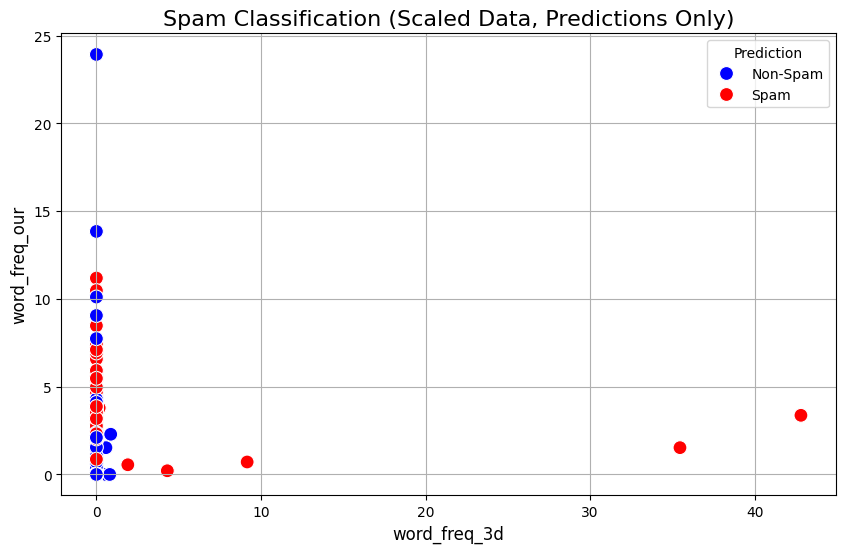

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

x_feature_name = spambase.columns[3]  # e.g., "word_freq_3d"
y_feature_name = spambase.columns[4]  # e.g., "word_freq_our"

# Prepare a DataFrame with the scaled columns
plot_data = pd.DataFrame({
    x_feature_name: X_test[:, 3],
    y_feature_name: X_test[:, 4],
    "Prediction": ["Spam" if pred == 1 else "Non-Spam" for pred in test_preds]
})

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_data,
    x=x_feature_name,
    y=y_feature_name,
    hue="Prediction",
    palette={"Non-Spam": "blue", "Spam": "red"},
    markers={"Non-Spam": "o", "Spam": "s"},
    s=100
)

# Add titles and labels
plt.title("Spam Classification (Scaled Data, Predictions Only)", fontsize=16)
plt.xlabel(x_feature_name, fontsize=12)
plt.ylabel(y_feature_name, fontsize=12)
plt.legend(title="Prediction")
plt.grid(True)

# Show the plot
plt.show()

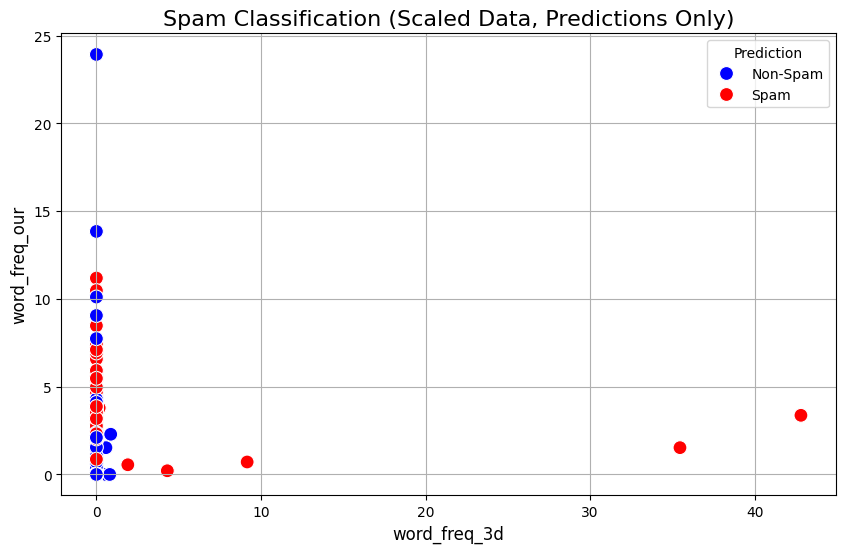

In [55]:
x_feature_name = spambase.columns[3]  # e.g., "word_freq_3d"
y_feature_name = spambase.columns[4]  # e.g., "word_freq_our"

# Prepare a DataFrame with the scaled columns
plot_data = pd.DataFrame({
    x_feature_name: X_test[:, 3],
    y_feature_name: X_test[:, 4],
    "Prediction": ["Spam" if pred == 1 else "Non-Spam" for pred in test_preds]
})

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_data,
    x=x_feature_name,
    y=y_feature_name,
    hue="Prediction",
    palette={"Non-Spam": "blue", "Spam": "red"},
    markers={"Non-Spam": "o", "Spam": "s"},
    s=100
)

# Add titles and labels
plt.title("Spam Classification (Scaled Data, Predictions Only)", fontsize=16)
plt.xlabel(x_feature_name, fontsize=12)
plt.ylabel(y_feature_name, fontsize=12)
plt.legend(title="Prediction")
plt.grid(True)

# Show the plot
plt.show()

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define a dictionary of hyperparameters to test, specifying the range of neighbors (k)
parameters = {"n_neighbors": range(1, 50)}

# Initialize GridSearchCV with KNeighborsRegressor and the parameter grid
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)

# Perform a grid search to find the best hyperparameter (number of neighbors) for the model
gridsearch.fit(X_train, y_train)

# Retrieve the best parameters found by GridSearchCV
gridsearch.best_params_

{'n_neighbors': 4}